In [1]:
#import library 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 

In [5]:
#Menampilkan dataset
test = pd.read_csv('breast-cancer.csv')
test

,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat,Class
0,'40-49','premeno','15-19','0-2','yes','3','right','left_up','no','recurrence-events'
1,'50-59','ge40','15-19','0-2','no','1','right','central','no','no-recurrence-events'
2,'50-59','ge40','35-39','0-2','no','2','left','left_low','no','recurrence-events'
3,'40-49','premeno','35-39','0-2','yes','3','right','left_low','yes','no-recurrence-events'
4,'40-49','premeno','30-34','3-5','yes','2','left','right_up','no','recurrence-events'
...,...,...,...,...,...,...,...,...,...,...
281,'50-59','ge40','30-34','6-8','yes','2','left','left_low','no','no-recurrence-events'
282,'50-59','premeno','25-29','3-5','yes','2','left','left_low','yes','no-recurrence-events'
283,'30-39','premeno','30-34','6-8','yes','2','right','right_up','no','no-recurrence-events'
284,'50-59','premeno','15-19','0-2','no','2','right','left_low','no','no-recurrence-events'


In [6]:
test = test[['age', 'menopause']]
test

,age,menopause
0,'40-49','premeno'
1,'50-59','ge40'
2,'50-59','ge40'
3,'40-49','premeno'
4,'40-49','premeno'
...,...,...
281,'50-59','ge40'
282,'50-59','premeno'
283,'30-39','premeno'
284,'50-59','premeno'


In [7]:
test.describe()

,age,menopause
count,286,286
unique,6,3
top,'50-59','premeno'
freq,96,150


In [8]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 286 entries, 0 to 285
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        286 non-null    object
 1   menopause  286 non-null    object
dtypes: object(2)
memory usage: 4.6+ KB


In [10]:
test.columns

Index(['age', 'menopause'], dtype='object')

In [11]:
from sklearn.preprocessing import LabelEncoder
for col in ['age', 'menopause']:
       le = LabelEncoder()
       test[col] = le.fit_transform(test[col])

C:\Users\62823\AppData\Local\Temp/ipykernel_41316/3748668350.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test[col] = le.fit_transform(test[col])


In [12]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 286 entries, 0 to 285
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   age        286 non-null    int32
 1   menopause  286 non-null    int32
dtypes: int32(2)
memory usage: 2.4 KB


<function matplotlib.pyplot.show(close=None, block=None)>

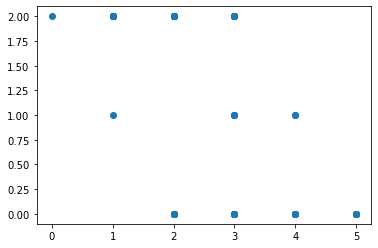

In [13]:
plt.scatter(test.age, test.menopause)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

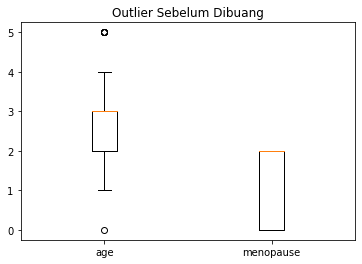

In [15]:
kolom = ['age', 'menopause']
plt.boxplot(test[kolom])
plt.xticks([1,2],kolom)
plt.title("Outlier Sebelum Dibuang")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

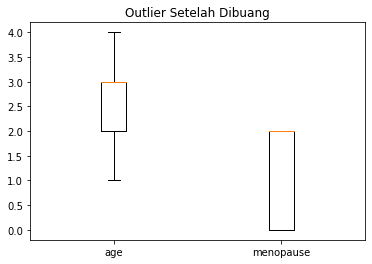

In [16]:
Q1 = test[kolom].quantile(0.25)
Q3 = test[kolom].quantile(0.75)
IQR = Q3 - Q1
min_iqr = (Q1 - 1.5 * IQR)
max_iqr = (Q3 + 1.5 * IQR)

test = test[~((test[kolom] < min_iqr) | (test[kolom] > max_iqr)).any(axis=1)]

plt.boxplot(test[kolom])
plt.xticks([1,2],kolom)
plt.title("Outlier Setelah Dibuang")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

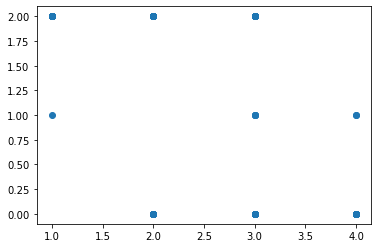

In [17]:
plt.scatter(test.age, test.menopause)
plt.show

In [18]:
test.describe()

,age,menopause
count,279.000000,279.000000
mean,2.623656,1.093190
std,0.951114,0.984734
min,1.000000,0.000000
25%,2.000000,0.000000
50%,3.000000,2.000000
75%,3.000000,2.000000
max,4.000000,2.000000


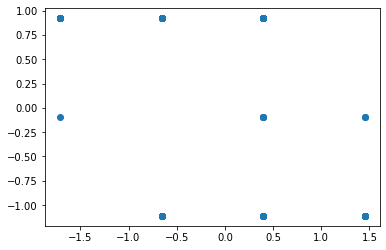

In [19]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_array = np.array(test)
x_scaled = scaler. fit_transform(x_array)


plt.scatter(x_scaled[:,0], x_scaled[:,1])
plt.show()


In [20]:
from sklearn.cluster import KMeans

kmeans = KMeans (n_clusters=3, random_state= 0)
kmeans.fit(x_scaled)

KMeans(n_clusters=3, random_state=0)

In [21]:
kmeans.cluster_centers_

array([[-0.35199005,  0.92252247],
       [ 0.78831964, -1.06481429],
       [-1.71017688,  0.89426338]])

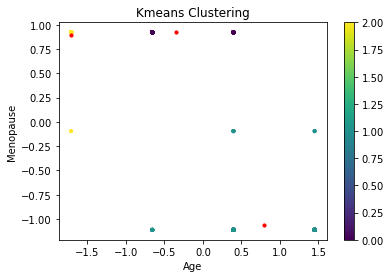

In [22]:
output = plt.scatter(x_scaled[:,0], x_scaled[:,1], s=10, c=kmeans.labels_)
centers = kmeans.cluster_centers_

plt.scatter(centers[:,0], centers[:,1], c='red', s=10)
plt.title("Kmeans Clustering")
plt.xlabel("Age")
plt.ylabel("Menopause")
plt.colorbar(output)
plt.show()

In [23]:
#Evaluasi Model Clustering 

from sklearn.metrics import davies_bouldin_score

labels = kmeans.labels_
davies_bouldin_score(x_scaled, labels)

0.4247411016239249